<a href="https://colab.research.google.com/github/naufalnashif/self-daily-repo/blob/main/twitter_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Analytics

## IPB Menfess

### Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ETL

In [ ]:
data = pd.read_excel('ipb_menfess-2.xlsx')
data.head(2)

,name,username,time,tweets,comment-count,like-count,engagement
0,IPB Menfess,@ipb_menfess,3 Feb,"Guys, yuk bantu",9,4,11 rb
1,IPB Menfess,@ipb_menfess,6mnt,-punten temen² pku ada yang les kalkulus ga? k...,1,NaN,117


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           868 non-null    object
 1   username       869 non-null    object
 2   time           869 non-null    object
 3   tweets         828 non-null    object
 4   comment-count  718 non-null    object
 5   like-count     484 non-null    object
 6   engagement     801 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [ ]:
data.isnull().sum()

name               4
username           3
time               3
tweets            44
comment-count    154
like-count       388
engagement        71
dtype: int64

In [ ]:
data_cleaned = data.dropna(subset=['tweets'])
data_cleaned.isnull().sum()

name               1
username           0
time               0
tweets             0
comment-count    113
like-count       350
engagement        28
dtype: int64

In [ ]:
duplicates = data_cleaned[data_cleaned.duplicated(subset = 'tweets')]
duplicates

,name,username,time,tweets,comment-count,like-count,engagement
39,IPB Menfess,@ipb_menfess,16j,"punten langsung saja, sabi like dan sebutkan a...",1,1,4 rb
40,IPB Menfess,@ipb_menfess,16j,"punten langsung saja, sabi like dan sebutkan a...",13,4,9 rb
43,IPB Menfess,@ipb_menfess,16j,punten masalah perempuan solusinya makan grati...,11,22,7 rb
102,IPB Bercanda,@IPBbercanda,3 Feb,A1 GAES,29,797,54 rb
107,IPB Bercanda,@IPBbercanda,3 Feb,A1 GAES,29,797,54 rb
139,IPB Menfess,@ipb_menfess,3 Feb,"Guys, yuk bantu",9,4,11 rb
146,IPB Menfess,@ipb_menfess,3 Feb,punten rapatkan barisan teman teman semua,15,104,27 rb
169,IPB Menfess,@ipb_menfess,3 Feb,"punten , ditengah krasak krusuk politik seengg...",17,76,21 rb
257,IPB Menfess,@ipb_menfess,2 Feb,Liat deh guys cowok aku lucu banget yahhh,26,39,11 rb
296,IPB Menfess,@ipb_menfess,1 Feb,SEWA PAPAN BUNGA AKRILIK BOGOR,6,5,1 rb


In [ ]:
data_cleaned[data_cleaned['tweets'] == 'punten langsung saja, sabi like dan sebutkan alesan milih']

,name,username,time,tweets,comment-count,like-count,engagement
38,IPB Menfess,@ipb_menfess,16j,"punten langsung saja, sabi like dan sebutkan a...",7,NaN,4 rb
39,IPB Menfess,@ipb_menfess,16j,"punten langsung saja, sabi like dan sebutkan a...",1,1,4 rb
40,IPB Menfess,@ipb_menfess,16j,"punten langsung saja, sabi like dan sebutkan a...",13,4,9 rb


In [ ]:
data_cleaned[data_cleaned['tweets'] == 'punten masalah perempuan solusinya makan gratis, masalah tugas laprak? makan gratiss, ada masalah pinjoll? ya makan gratis, masalah motor rusak? makan gratis lah, masalah internet? makan coy, masalah kemacetan dramaga!? makan gratis laa']

,time,tweets,comment-count,like-count,engagement
41,16j,punten masalah perempuan solusinya makan grati...,11,21,7 rb
43,16j,punten masalah perempuan solusinya makan grati...,11,22,7 rb


In [ ]:
duplicates_all = data_cleaned[data_cleaned.duplicated()]
duplicates_all

,name,username,time,tweets,comment-count,like-count,engagement
102,IPB Bercanda,@IPBbercanda,3 Feb,A1 GAES,29,797,54 rb
107,IPB Bercanda,@IPBbercanda,3 Feb,A1 GAES,29,797,54 rb
139,IPB Menfess,@ipb_menfess,3 Feb,"Guys, yuk bantu",9,4,11 rb
146,IPB Menfess,@ipb_menfess,3 Feb,punten rapatkan barisan teman teman semua,15,104,27 rb
169,IPB Menfess,@ipb_menfess,3 Feb,"punten , ditengah krasak krusuk politik seengg...",17,76,21 rb
257,IPB Menfess,@ipb_menfess,2 Feb,Liat deh guys cowok aku lucu banget yahhh,26,39,11 rb
296,IPB Menfess,@ipb_menfess,1 Feb,SEWA PAPAN BUNGA AKRILIK BOGOR,6,5,1 rb
435,asdfghjkl,@IffyIvory,30 Jan,"MAKASIII MINN, LOPYU SEKEBON",1,1,894
472,IPB Menfess,@ipb_menfess,30 Jan,OPEN FOLLBACK,83,35,14 rb
551,IPB Menfess,@ipb_menfess,29 Jan,"The real investasi masa depan sih ini, gas kep...",2,1,1 rb


In [ ]:
data_cleaned = data_cleaned.drop_duplicates()
print(data.shape)
print(data_cleaned.shape)

(872, 11)
(833, 7)


In [ ]:
data_cleaned.isnull().sum()

name               1
username           0
time               0
tweets             0
comment-count    113
like-count       350
engagement        28
dtype: int64

In [ ]:
data_cleaned = data.dropna(subset=['name'])

# Mengisi nilai NaN dengan 0 pada seluruh DataFrame
data_cleaned.fillna(0, inplace=True)

<ipython-input-121-a65fa2f33a54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.fillna(0, inplace=True)


In [ ]:
data_cleaned[data_cleaned['comment-count'].astype(str).str.isdigit()==False]
# is_digit_like = data_cleaned['like-count'].astype(str).str.isdigit()
# is_digit_engagement = data_cleaned['engagement'].astype(str).str.isdigit()

,name,username,time,tweets,comment-count,like-count,engagement
541,UNRWA,@UNRWA,28 Jan,Images taken yesterday of people queuing for f...,3 rb,9 rb,2 jt
550,@ipb_menfess,·,29 Jan,@pacmannai,·,Karir cemerlang dengan JOB PREPARATION PROGRAM...,Belajar selama 18 bulam di program mendalam da...
665,@ipb_menfess,·,10 Jan,"Mulai hari ini, menfess hanya dapat dikirim me...",·,Allo akak!,0
666,@ipb_menfess,·,10 Jan,JANGAN LUPA sebelum mengirim cek rules di,t.me,Bot IPB Menfess,You can contact @ipbfessbot right away.


In [ ]:
# Fungsi untuk mengonversi 'rb' dan 'jt' ke nilai numerik dan mengganti non digit menjadi 0
def convert_to_numeric(value):
    if pd.notna(value):
        if 'rb' in str(value):
            return int(str(value)[:-2]) * 1000
        elif 'jt' in str(value):
            return int(str(value)[:-2]) * 1000000
        elif any(char.isdigit() for char in str(value)):
            return int(''.join(filter(str.isdigit, str(value))))
    return 0

# Mengaplikasikan fungsi ke kolom 'comment-count', 'like-count', dan 'engagement'
data_cleaned['comment-count'] = data_cleaned['comment-count'].apply(convert_to_numeric)
data_cleaned['like-count'] = data_cleaned['like-count'].apply(convert_to_numeric)
data_cleaned['engagement'] = data_cleaned['engagement'].apply(convert_to_numeric)


In [ ]:
data_cleaned.head()

,name,username,time,tweets,comment-count,like-count,engagement
0,IPB Menfess,@ipb_menfess,3 Feb,"Guys, yuk bantu",9,4,11000
1,IPB Menfess,@ipb_menfess,6mnt,-punten temen² pku ada yang les kalkulus ga? k...,1,0,117
2,IPB Menfess,@ipb_menfess,11mnt,punten yang tau tempat nyari jurnal selain gsc...,5,8,334
3,IPB Menfess,@ipb_menfess,17mnt,"punten temen sender friendly bgt, kok bisa. Da...",0,0,199
4,IPB Menfess,@ipb_menfess,19mnt,cape ga sih selalu sendiri di kelas pdhl selal...,0,0,192


In [ ]:
data_cleaned[data_cleaned['comment-count'].astype(str).str.isdigit()==False]

,name,username,time,tweets,comment-count,like-count,engagement


#### Konversi time 'mnt', 'j' menjadi tanggal 5 februari 2024

In [ ]:
# from datetime import datetime, timedelta
# # Fungsi untuk mengonversi nilai 'mnt' menjadi tanggal
# def convert_to_date(value):
#     if pd.notna(value):
#         if 'mnt' in value:
#             minutes = int(value[:-3])
#             return (datetime.now() - timedelta(minutes=minutes)).strftime('%Y-%m-%d')
#         elif 'j' in value:
#             days = int(value[:-1])
#             return (datetime.now() - timedelta(days=days)).strftime('%Y-%m-%d')
#     return value

# # Mengaplikasikan fungsi ke kolom 'mnt'
# data_cleaned['time'] = data_cleaned['time'].apply(convert_to_date)

# data_cleaned.head()

In [ ]:
from datetime import datetime, timedelta
# Fungsi untuk mengonversi nilai 'mnt' menjadi tanggal
def convert_to_date(value):
    if pd.notna(value):
        if 'mnt' in value:
            minutes = int(value[:-3])
            return (datetime.now() - timedelta(minutes=minutes)).strftime('%Y-%m-%d')
        elif 'j' in value:
            hours = int(value[:-1])
            return (datetime.now() - timedelta(hours=hours)).strftime('%Y-%m-%d')
        else:
            try:
                return datetime.strptime(value, '%d %b').replace(year=2024).strftime('%Y-%m-%d')
            except ValueError:
                pass

    return None

# Mengaplikasikan fungsi ke kolom 'time'
data_cleaned['time'] = data_cleaned['time'].apply(convert_to_date)
# data_cleaned = data_cleaned.dropna(subset=['time'])

## Data Preprocessing

### Data Cleaning

In [ ]:
!pip install regex jsons nltk sastrawi wordcloud collection

In [ ]:
import re

import json

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from nltk.tokenize import word_tokenize
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer

In [ ]:
data_cleaned['tweets'] = data_cleaned['tweets'].astype(str)

In [ ]:
data_cleaned.to_csv('data_normal.csv', index=False)

In [ ]:
file_path = 'data_normal.csv'
df_labels = pd.read_csv(file_path)
df_labels.head(2)

,name,username,time,tweets,comment-count,like-count,engagement
0,IPB Menfess,@ipb_menfess,2024-02-03,"Guys, yuk bantu",9,4,11000
1,IPB Menfess,@ipb_menfess,2024-02-05,-punten temen² pku ada yang les kalkulus ga? k...,1,0,117


In [ ]:
# RegEx Function
def apply_regex_cleaning(text):
    # Tahap-1: Non-ascii
    res = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Tahap-2: URLs
    res = re.sub(r'http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+', ' ', res)
    res = re.sub(r'pic.twitter.com?.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+', ' ', res)
    # Tahap-3: mentions
    res = re.sub(r'\@([\w]+)', ' ', res)
    # Tahap-4_alt-1: hapus tagar
    res = re.sub(r'\#([\w]+)', ' ', res)
    # Menghapus 'amp' yang menempel pada '&' dan 'gt' yang menempel pada '&'
    res = re.sub(r'&amp;|&gt;', '', res)
    # Tahap-6: simbol
    res = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', res)
    # Tahap-7: angka
    res = re.sub(r'[0-9]+', '', res)
    # Tahap-8: koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
    res = re.sub(r'([a-zA-Z])\1\1', '\\1', res)
    # Tahap-9 Menghapus kata 'bgr', 'cc', 'rp', dan lain - lain
    res = re.sub(r'\b(cc|rp|k|x|y)\b', '', res, flags=re.IGNORECASE)
    # Tahap-10: spasi ganda (atau lebih) menjadi satu spasi
    res = re.sub(' +', ' ', res)
    # Tahap-11: spasi di awal dan akhir kalimat
    res = re.sub(r'^[ ]|[ ]$', '', res)
    # Tahap-12: konversi ke karakter huruf kecil
    res = res.lower()
    # Tahap-13: koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
    res = re.sub(r'([a-zA-Z])\1\1', '\\1', res)

    return res

In [ ]:
# Loop function to get by tweet
def clean_column_with_regex(file_path, column_name):
    try:
        df = pd.read_csv(file_path)
        column_data = df[column_name]
        cleaned_data = [apply_regex_cleaning(text) for text in column_data]

        cleaned_df = pd.DataFrame({column_name: cleaned_data})
        cleaned_file_path = 'tweets-cleaned.csv'
        cleaned_df.to_csv(cleaned_file_path, index=False)

        print(f"Data cleaned and saved to {cleaned_file_path}")
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
#Execute
def main():
    file_path = 'data_normal.csv'
    column_name_to_clean = 'tweets'  # Ganti dengan nama kolom yang ingin Anda bersihkan

    try:
        clean_column_with_regex(file_path, column_name_to_clean)
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Data cleaned and saved to tweets-cleaned.csv


In [ ]:
tweetsCleaned = pd.read_csv('tweets-cleaned.csv')
tweetsCleaned.head()

,tweets
0,guys yuk bantu
1,punten temen pku ada yang les kalkulus ga kala...
2,punten yang tau tempat nyari jurnal selain gsc...
3,punten temen sender friendly bgt kok bisa dan ...
4,cape ga sih selalu sendiri di kelas pdhl selal...


In [ ]:
tweetsCleaned['tweets-cleaned'] = tweetsCleaned['tweets']
tweetsCleaned = tweetsCleaned.drop(columns= 'tweets')

# Combined tweetsCleaned with datasets
combined_df = pd.concat([data_cleaned, tweetsCleaned], axis=1)
combined_df.head()

,name,username,time,tweets,comment-count,like-count,engagement,tweets-cleaned
0,IPB Menfess,@ipb_menfess,2024-02-03,"Guys, yuk bantu",9.0,4.0,11000.0,guys yuk bantu
1,IPB Menfess,@ipb_menfess,2024-02-05,-punten temen² pku ada yang les kalkulus ga? k...,1.0,0.0,117.0,punten temen pku ada yang les kalkulus ga kala...
2,IPB Menfess,@ipb_menfess,2024-02-05,punten yang tau tempat nyari jurnal selain gsc...,5.0,8.0,334.0,punten yang tau tempat nyari jurnal selain gsc...
3,IPB Menfess,@ipb_menfess,2024-02-05,"punten temen sender friendly bgt, kok bisa. Da...",0.0,0.0,199.0,punten temen sender friendly bgt kok bisa dan ...
4,IPB Menfess,@ipb_menfess,2024-02-05,cape ga sih selalu sendiri di kelas pdhl selal...,0.0,0.0,192.0,cape ga sih selalu sendiri di kelas pdhl selal...


In [ ]:
output_cleaned_path = 'tweets-cleaned.csv'
combined_df.to_csv(output_cleaned_path, index=False)

### Normalization Words

In [ ]:
# THIS CASE WHEN YOUR KERNEL CONNECTING AGAIN, YOU CAN BEGIN FROM THIS STAGE
# Mengimpor data CSV
output_cleaned_path = 'tweets-cleaned.csv'
df = pd.read_csv(output_cleaned_path)

# Membaca kamus kata gaul Salsabila
kamus_path = '_json_colloquial-indonesian-lexicon.txt'
with open(kamus_path) as f:
    data = f.read()
lookp_dict = json.loads(data)

In [ ]:
# Custom slang dict to adjust the topic

kamus_gaul_baru = {
    'kurangg': 'kurang',
    'udaa': 'udah',
    'mnurut': 'menurut',
    'anyinh': 'anjing',
    'seputat': 'seputar',
    'ijo'	 : 'hijau',
    'dmma'	: 'dimana',
    'anjrot'	: 'anjing',
    'ajgg'	: 'anjing',
    'keboen'	: 'kebun',
    'aseekk'	: 'asik',
    'bliau' :	'beliau',
    'aseek' :	'asik',
    'berpaa' :	'berapa',
    'berpa' :	'berapa',
    'bggtt' :	'banget',
    'cntoh' :	'contoh',
    'anzink'	: 'anjing',
    'jrg' :	'jarang',
    'msi' :	'masih',
    'anjirt' :	'anjing',
    'kesampeian' :	'kesampaian',
    'dtgnya' :	'datangnya',
    'dtg' :	'datang',
    'dngin' :	'dingin',
    'ktub' :	'kutub',
    'brngkt' : 'berangkat',
    'antra'	: 'antara',
    'pinuh': 'penuh',
    'anjink': 'anjing',
    'anjir' : 'anjing',
    'ajg': 'anjing',
    'smpet': 'sempat',
    'sempet': 'sempat',
    'makai': 'memakai',
    'bgst': 'bangsat',
    'anjg': 'anjing',
    'cpk': 'lelah',
    'capek': 'lelah',
    'capk': 'lelah',
    'cpek': 'lelah',
    'anjrit': 'anjing',
    'anjig': 'anjing',
    'anjigg': 'anjing',
    'anjingg': 'anjing',
    'bukann': 'bukan',
    'skrgg': 'sekarang',
    'makasihh': 'terimakasih',
    'asu': 'anjing',
    'moga': 'semoga',
    'cok': 'jancok',
    'cokk': 'jancok',
    'cook': 'jancok',
    'cookk': 'jancok',
    'amgkot': 'angkot',
    'gua' : 'aku',
    'gweh': 'aku',
    'guah': 'aku',
    'gw': 'aku',
    'gwah': 'aku',
    'gue' : 'aku',
    'wkwkwk' : 'wkwk',
    'dah' : 'udah',
    'tkt' : 'takut',
    'gabisa' : 'gabisa',
    'umumm' : 'umum',
    'umuum' : 'umum',
    'yah' : 'yah',
    'drtd' : 'daritadi',
    'drtdi' : 'daritadi',
    'ges':'gais',
    'gays': 'gais',
    'geys':'gais',
    'trans pakuan': 'transpakuan',
    'anjr' : 'anjir',
    'anjer' : 'anjing',
    'njir' : 'anjing',
    'anjr' : 'anjing',
    'trans pakuan' : 'transpakuan',
    'gblk' : 'goblok',
}


In [ ]:
# Update dict
lookp_dict.update(kamus_gaul_baru)

In [ ]:
def replace_with_slang(text, slang_dict):
    if isinstance(text, str):  # Memeriksa apakah nilai teks bukan NaN
        return " ".join(slang_dict.get(word, word) for word in text.split())
    return text  # Mengembalikan nilai NaN tanpa mengubahnya

# Mengganti kata-kata dalam kolom 'cleaned-content' dengan kata-kata dalam kamus
df['tweets-norm'] = df['tweets-cleaned'].apply(lambda x: replace_with_slang(x, lookp_dict))

# Menyimpan hasil ke file Excel baru
output_norm_path = 'normalisasi-tweets.csv'
df.to_csv(output_norm_path, index=False)

### Stopwords Removal

In [ ]:
# Tambahkan kata-kata tambahan ke kamus stopwords
additional_stopwords = ['punten', 'gais', 'guys']  # Ganti dengan kata-kata yang ingin Anda tambahkan
stop_words = set(stopwords.words('indonesian'))
stop_words.update(additional_stopwords)

# Hapus beberapa kata dari kamus stopwords agar tidak terhapus pada tweets
words_to_remove = []
for word in words_to_remove:
    if word in stop_words:
        stop_words.remove(word)

print("Updated stopwords list:", stop_words)
len(stop_words)

Updated stopwords list: {'diberikan', 'terutama', 'pantas', 'demi', 'ucapnya', 'sebegini', 'meyakinkan', 'jadi', 'padahal', 'seorang', 'tahu', 'datang', 'berapalah', 'dituturkan', 'kok', 'terlihat', 'dialah', 'hendak', 'berakhirlah', 'mengira', 'antara', 'antaranya', 'kelihatan', 'ditunjuk', 'ingat-ingat', 'diri', 'mengingatkan', 'bapak', 'saatnya', 'kamilah', 'balik', 'dahulu', 'setidaknya', 'memihak', 'tambah', 'sudahlah', 'terjadi', 'terjadilah', 'biasa', 'lainnya', 'ditanyai', 'diantara', 'bermula', 'belumlah', 'dibuat', 'berlangsung', 'kapanpun', 'suatu', 'memerlukan', 'berakhirnya', 'malah', 'berikan', 'semua', 'dipunyai', 'bisa', 'segera', 'makanya', 'menambahkan', 'sebaiknya', 'tiga', 'siapa', 'besar', 'wahai', 'dikarenakan', 'itukah', 'tiba', 'akhir', 'sejak', 'akhirnya', 'begini', 'melihat', 'tadi', 'dimaksudkan', 'kan', 'namun', 'kepadanya', 'sejenak', 'diketahuinya', 'bukan', 'kelima', 'tandas', 'apabila', 'pastilah', 'katakan', 'padanya', 'pertama-tama', 'inginkan', 'kata'

760

In [ ]:

norm_output = 'normalisasi-tweets.csv'
output_file_stopw = "stopword-removal.csv"

data = pd.read_csv(norm_output)
column_name = "tweets-norm"  # Change this to the actual column name

# Process the data and remove stopwords
def remove_stopwords(line):
    if isinstance(line, str):
        return " ".join([word for word in line.split() if word not in stop_words])
    return line

data['stopwords-remove'] = data[column_name].apply(remove_stopwords)

# Save the processed data to a new Excel file
data.to_csv(output_file_stopw, index=False)

print("Stopwords removed and saved to", output_file_stopw)

Stopwords removed and saved to stopword-removal.csv


### Stemming

In [ ]:
# # Membuat objek stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # Load data dari file XLSX
# stopw_output =   "datasets/stopword-removal.csv"
# output_file_stem = "datasets/stemmed-tweets.csv"

# # Membaca data dari file XLSX
# data = pd.read_csv(stopw_output)

In [ ]:
# # Define a function to perform stemming
# def stem_sentence(sentence):
#     words = sentence.split()
#     stemmed_words = [stemmer.stem(word) for word in words]
#     return ' '.join(stemmed_words)

# # Apply stemming to the 'stopwords-remove' column, handling NaN values
# data['stemmed_tweets'] = data['stopwords-remove'].apply(lambda x: stem_sentence(x) if pd.notnull(x) else '')

# # Save the stemmed data to XLSX file
# data.to_csv(output_file_stem, index=False)

# print("Stemmed tweets saved to", output_file_stem)

Stemmed tweets saved to datasets/stemmed-tweets.csv


### Tokenization

In [ ]:
# Load data from XLSX file
stem_output = "stopword-removal.csv"
output_file = "tokenized_tweets.csv"

# Read data from XLSX file
data = pd.read_csv(stem_output)

In [ ]:
# # Pastikan semua nilai dalam kolom "content" adalah string
# data['stemmed_tweets'] = data['stemmed_tweets'].astype(str)

# def tokenize_sentence(sentence):
#     tokens = word_tokenize(sentence)
#     return tokens

# # Melakukan tokenisasi
# data['tokenized_content'] = data['stemmed_tweets'].apply(tokenize_sentence)


In [ ]:
# Pastikan semua nilai dalam kolom "content" adalah string
data['stopwords-remove'] = data['stopwords-remove'].astype(str)

def tokenize_sentence(sentence):
    tokens = word_tokenize(sentence)
    return tokens

# Melakukan tokenisasi
data['tokenized_tweets'] = data['stopwords-remove'].apply(tokenize_sentence)

In [ ]:
# Save the tokenized data to XLSX file
data.to_csv(output_file, index=False)

print("Tokenized tweets saved to", output_file)

Tokenized tweets saved to tokenized_tweets.csv


## Exploratory Data Analysis (EDA)

### EDA by time & Most comments, likes, engagements

In [ ]:
data_cleaned.shape

(833, 7)

#### Plot by time

In [ ]:
data_cleaned['time'].value_counts().sort_index(ascending=False)

2024-02-05     30
2024-02-04     80
2024-02-03     70
2024-02-02     80
2024-02-01     63
2024-01-31     70
2024-01-30    110
2024-01-29     64
2024-01-28     95
2024-01-27    112
2024-01-26     51
2024-01-10      2
Name: time, dtype: int64

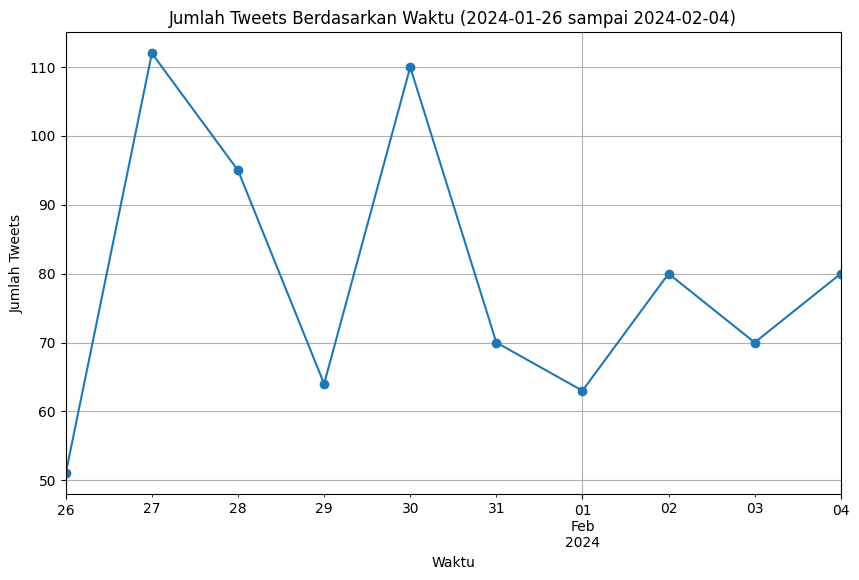

In [ ]:
# Konversi kolom 'time' ke datetime
data_cleaned['time'] = pd.to_datetime(data_cleaned['time'], errors='coerce')

# Batasi rentang tanggal dari '2024-01-26' sampai '2024-02-04'
start_date = pd.to_datetime('2024-01-26')
end_date = pd.to_datetime('2024-02-04')
data_cleaned_filtered = data_cleaned[data_cleaned['time'].between(start_date, end_date)]

# Plot berdasarkan waktu
plt.figure(figsize=(10, 6))
data_cleaned_filtered['time'].value_counts().sort_index(ascending=False).plot(kind='line', marker='o')
plt.title('Jumlah Tweets Berdasarkan Waktu (2024-01-26 sampai 2024-02-04)')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tweets')
plt.grid(True)
plt.show()

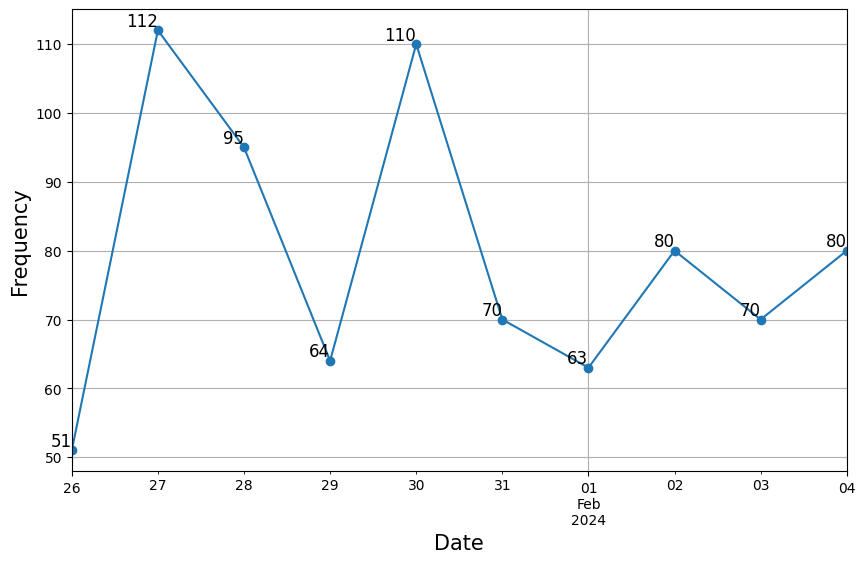

In [ ]:
# Plot berdasarkan waktu
plt.figure(figsize=(10, 6))
counts = data_cleaned_filtered['time'].value_counts().sort_index(ascending=False)
counts.plot(kind='line', marker='o')

# Menambahkan label frekuensi di atas setiap titik
for x, y in zip(counts.index, counts.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=12)  # Atur ukuran font di sini

plt.xlabel('Date', fontsize=15)  # Atur ukuran font di sini
plt.ylabel('Frequency', fontsize=15)  # Atur ukuran font di sini
plt.grid(True)
plt.show()

In [ ]:
data_cleaned[data_cleaned['time']=='2024-01-27']

#### Most comments, Most Likes, Most Engagements Tanggal 27

In [ ]:
# Set opsi tampilan DataFrame untuk menampilkan semua baris dan kolom
pd.set_option('display.max_colwidth', None)

In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-27')].sort_values(by='comment-count', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
808,IPB Menfess,@ipb_menfess,2024-01-27,Yang kena unfoll otomatis mana,139,2,17000
725,IPB Menfess,@ipb_menfess,2024-01-27,"Punten ada yang mau adopt bebek ga? Udah umur sebulan (udh putih bulunya, bukan kuning). Gratis kandang sama purnya. Kos aku ga hewan friendly",61,48,23000


In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-27')].sort_values(by='like-count', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
814,IPB Menfess,@ipb_menfess,2024-01-27,"Punten program capres kok makan siang gratis, itu mah agrianita juga bisa, rugi dongg! yang bener ajaa",33,132,43000
800,IPB Menfess,@ipb_menfess,2024-01-27,Punten kalau hilirisasi anak agh praktikum di mana,7,100,16000


In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-27')].sort_values(by='engagement', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
814,IPB Menfess,@ipb_menfess,2024-01-27,"Punten program capres kok makan siang gratis, itu mah agrianita juga bisa, rugi dongg! yang bener ajaa",33,132,43000
725,IPB Menfess,@ipb_menfess,2024-01-27,"Punten ada yang mau adopt bebek ga? Udah umur sebulan (udh putih bulunya, bukan kuning). Gratis kandang sama purnya. Kos aku ga hewan friendly",61,48,23000


#### Most comments, Most Likes, Most Engagements Tanggal 27

In [ ]:
# Set opsi tampilan DataFrame untuk menampilkan semua baris dan kolom
pd.set_option('display.max_colwidth', None)

In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-30')].sort_values(by='comment-count', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
443,IPB Menfess,@ipb_menfess,2024-01-30,OPEN FOLLBACK,83,35,14000
469,IPB Menfess,@ipb_menfess,2024-01-30,"punten halo!! izinkan saya mengundang kalian lagi yaa, kali ini diadakan di koin esok Rabu, 31 Januari. Ayo baca buku ditemani suara pohon, motor, burung, dan orang lewat. Sila ajukan pertanyaan di reply yaa",67,91,30000


In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-30')].sort_values(by='like-count', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
494,IPB Menfess,@ipb_menfess,2024-01-30,punten kenapa ya ipb isinya people pleasure semua? dari dulu aku bingung kenapa bisa gitu.\neh setelah tau ternyata karena ipb dasarnya agree culture xixixixi ngakak abiezzz,59,243,29000
416,IPB Menfess,@ipb_menfess,2024-01-30,"Punten, akhirnya bogor menunjukkan jati dirinya sebagai kota hujan",21,121,17000


In [ ]:
data_cleaned[(data_cleaned['name'] == 'IPB Menfess') & (data_cleaned['time'] == '2024-01-30')].sort_values(by='engagement', ascending=False).head(2)

,name,username,time,tweets,comment-count,like-count,engagement
469,IPB Menfess,@ipb_menfess,2024-01-30,"punten halo!! izinkan saya mengundang kalian lagi yaa, kali ini diadakan di koin esok Rabu, 31 Januari. Ayo baca buku ditemani suara pohon, motor, burung, dan orang lewat. Sila ajukan pertanyaan di reply yaa",67,91,30000
494,IPB Menfess,@ipb_menfess,2024-01-30,punten kenapa ya ipb isinya people pleasure semua? dari dulu aku bingung kenapa bisa gitu.\neh setelah tau ternyata karena ipb dasarnya agree culture xixixixi ngakak abiezzz,59,243,29000


#### Most comments, Most Likes, Most Engagements

In [ ]:
# Set opsi tampilan DataFrame untuk menampilkan semua baris dan kolom
pd.set_option('display.max_colwidth', None)

In [ ]:
data_cleaned[data_cleaned['name']=='IPB Menfess'].sort_values(by='comment-count', ascending=False).head(5)

,name,username,time,tweets,comment-count,like-count,engagement
606,IPB Menfess,@ipb_menfess,2024-01-28,First impression pertama kali menginjak Dramaga -punten,204,96,26000
808,IPB Menfess,@ipb_menfess,2024-01-27,Yang kena unfoll otomatis mana,139,2,17000
335,IPB Menfess,@ipb_menfess,2024-02-01,punten kalian selama kuliah naik berat badan brp kg??? sender 14 kg,92,29,15000
443,IPB Menfess,@ipb_menfess,2024-01-30,OPEN FOLLBACK,83,35,14000
354,IPB Menfess,@ipb_menfess,2024-01-31,"Makanan/minuman di Dramaga yang menurut lo enak banget punten, coba spill",78,74,26000


In [ ]:
data_cleaned[data_cleaned['name']=='IPB Menfess'].sort_values(by='like-count', ascending=False).head(5)

,name,username,time,tweets,comment-count,like-count,engagement
494,IPB Menfess,@ipb_menfess,2024-01-30,punten kenapa ya ipb isinya people pleasure semua? dari dulu aku bingung kenapa bisa gitu.\neh setelah tau ternyata karena ipb dasarnya agree culture xixixixi ngakak abiezzz,59,243,29000
830,IPB Menfess,@ipb_menfess,2024-01-26,"punten capek-capek kuliah kimia/biokimia, eh dukung paslon yang nyuruh ibu hamil buat konsumsi asam sulfat. yang bener ajee, mati dong",24,223,35000
273,IPB Menfess,@ipb_menfess,2024-02-02,punten percakapan dengan adek gw\nadek: gw mau masuk ipb deh \ngw: lah tiba tiba\nadek: biar selalu rendah hati\ngw: hah\nadek: karena ipb adalah ilmu padi brader,31,223,25000
396,IPB Menfess,@ipb_menfess,2024-01-31,"punten itu sv beneran? Ya Allah kasian banget mahasiswa pengen kuliah, bener-bener ya emang, padahal kampus terbaik tapi dekanatnya ga solutif, gws deh",42,160,49000
315,IPB Menfess,@ipb_menfess,2024-02-01,-punten mutualan yuuu angkatan berapa ajaa like aja yaaa,17,152,6000


In [ ]:
data_cleaned[data_cleaned['name']=='IPB Menfess'].sort_values(by='engagement', ascending=False).head(5)

,name,username,time,tweets,comment-count,like-count,engagement
352,IPB Menfess,@ipb_menfess,2024-01-31,"Punten ini katanya di fateta, apa bener infonya? Ini kenapa dehh",24,38,76000
342,IPB Menfess,@ipb_menfess,2024-01-31,Punten guys jd ini ril kebakaran atau ....\n\ntolong info yg sil,43,59,74000
396,IPB Menfess,@ipb_menfess,2024-01-31,"punten itu sv beneran? Ya Allah kasian banget mahasiswa pengen kuliah, bener-bener ya emang, padahal kampus terbaik tapi dekanatnya ga solutif, gws deh",42,160,49000
827,IPB Menfess,@ipb_menfess,2024-01-26,"punten lagi baca baca granddesign, nemu ini. plis jelasin tepungnisasi itu apa? udah nyari di scholar dan ipbrepository gaada masa:(",32,87,43000
814,IPB Menfess,@ipb_menfess,2024-01-27,"Punten program capres kok makan siang gratis, itu mah agrianita juga bisa, rugi dongg! yang bener ajaa",33,132,43000


#### Wordclouds

### Stopwords & Most Common Words

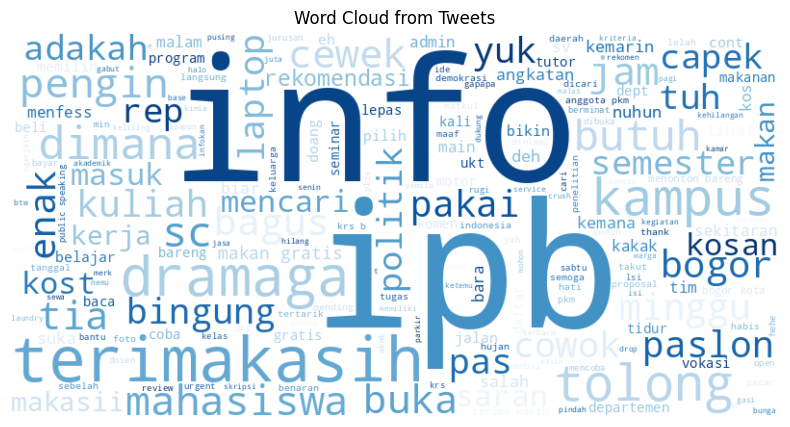

In [ ]:
# Concatenate all tokenized tweets into a single string
all_tweets_tokens = data['tokenized_tweets']  # Replace 'tokenized_tweets' with the actual column name in your data

# Convert each list of tokens into a string
all_tweets_text = ' '.join([' '.join(map(str, tokens)) for tokens in all_tweets_tokens])

# Remove unwanted characters
cleaned_text = re.sub(r"['\[\],]", "", all_tweets_text)

remove_words = ['ya', 'sender', 'banget', 'kalo', 'tau', 'teman', 'nan', 'nan', 'sih', 'nya', 'dm', 'reply', 'kayak', 'anak', 'orang', 'nih', 'kah', 'lu']
cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in remove_words])

# Create a WordCloud object
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Blues',   # Warna huruf
                      contour_color='black',  # Warna kontur
                      contour_width=2,       # Lebar kontur
                      mask=None,             # Gunakan mask untuk bentuk kustom
                      ).generate(cleaned_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud from Tweets')
plt.axis('off')
plt.show()

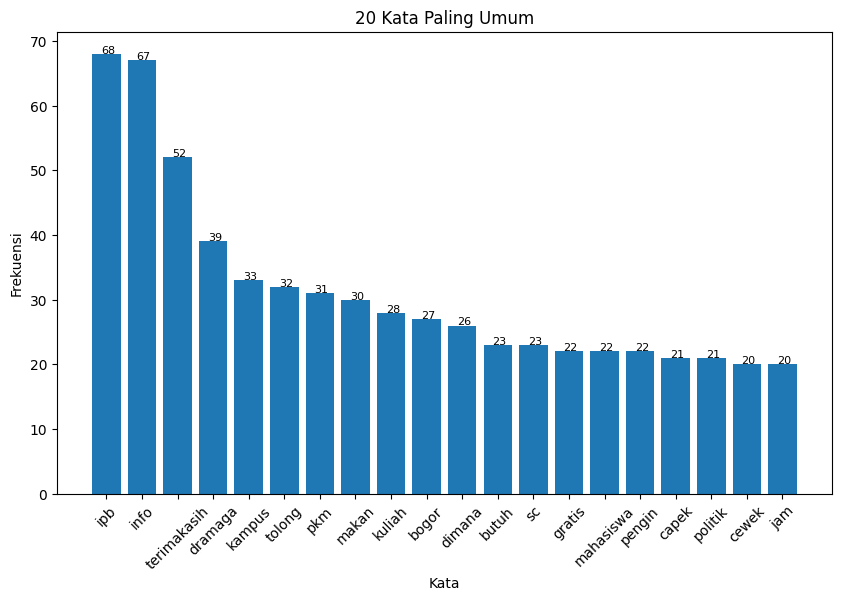

[('ipb', 68), ('info', 67), ('terimakasih', 52), ('dramaga', 39), ('kampus', 33), ('tolong', 32), ('pkm', 31), ('makan', 30), ('kuliah', 28), ('bogor', 27), ('dimana', 26), ('butuh', 23), ('sc', 23), ('gratis', 22), ('mahasiswa', 22), ('pengin', 22), ('capek', 21), ('politik', 21), ('cewek', 20), ('jam', 20)]


In [ ]:
# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(common_words, common_counts)
plt.title('20 Kata Paling Umum')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')

# Menambahkan teks label di atas setiap bar
for bar, count in zip(bars, common_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), fontsize=8)

plt.xticks(rotation=45)
plt.show()

print(most_common_words)